心得報告:

這是我第一次接觸到matlab程式，不過骨架化程式並不複雜，使用skimage內的套件來執行膨脹、侵蝕、open等運算就大致完成了，不過我的方法和使用套件的骨架化結果還是有很大的區別。此外，這次作業涉及到的數學形態學也是讓我開了眼界，像是侵蝕、膨脹的原理以及為何能用於影像處理。



研究骨架化Matlab程式，並改寫為Python版，找影像中的物件的骨架。

<Figure size 640x480 with 0 Axes>

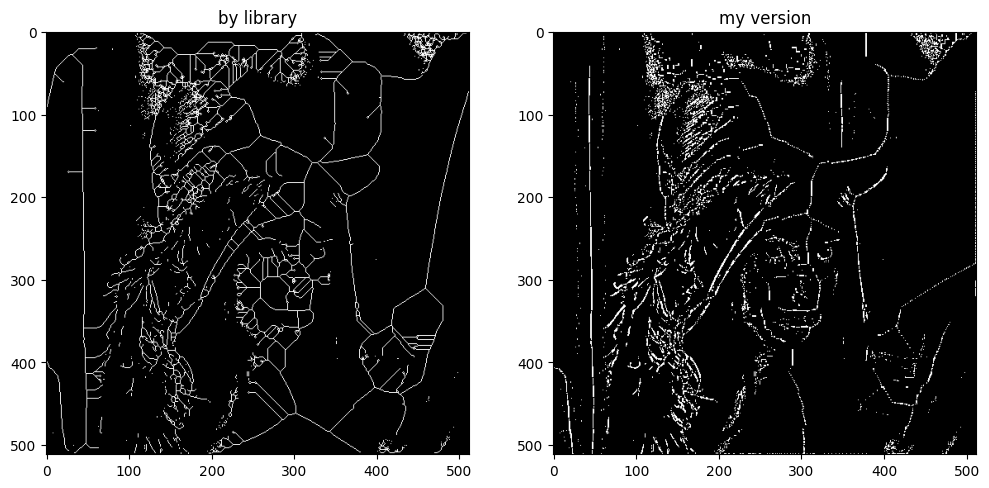

In [ ]:
from skimage import io
from skimage.morphology import skeletonize,square
from skimage.morphology import binary_erosion as bwerode
from skimage.morphology import binary_opening as bwopen
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
def skel(img,structure):
  result=np.zeros_like(img)#創建同大小矩陣，存放骨架化後影像
  while(np.any(img)):
    o=bwopen(img,structure)#先做開運算
    result=result|(img&~o)
    img=bwerode(img,structure)#erode 侵蝕
  return result

img=io.imread('lena.png',as_gray=True)
thresh = threshold_otsu(img)
img_binary=(img>thresh)#convert to binary img
result=skeletonize(img_binary)

structure = square(3)
result2 = skel(img_binary, structure)#call skel function

fig=plt.figure()
fig = plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(121)
ax1.imshow(result,cmap='gray')
ax1.set_title('by library')
ax2=fig.add_subplot(122)
ax2.imshow(result2,cmap='gray')
ax2.set_title('my version')
plt.show()
